In [1]:
import os
import pandas as pd

In [2]:
all_data = pd.read_excel(r'/Users/Pro/Desktop/EtlProject_Web-Scraping/Mubawab_Location/mubawabLocation_all-data_clean_lastVersion.xlsx')
all_data.head()

,id,Title,Price,Location,City,Caractéristiques,Pieces,Description,Pictures,Telephone,Durée,Surface
0,1,Bel studio Haut standing neuf,7 000 DH,Gauthier,Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",50 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Appartement à louer idéalement placé. Prix 7 0...,['https://www.mubawab-media.com/ad/7/402/046F/...,06601XXXXX,Monthly,50 m²
1,2,Très joli appartement sans vis à vis,15 000 DH,Les princesses,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Cheminée'...",150 m² 4 Pièces 3 Chambres 3 Salles de bains...,Belles prestations pour cet appartement à loue...,['https://www.mubawab-media.com/ad/7/417/505F/...,06601XXXXX,Monthly,150 m²
2,3,Très joli studio HS plien gauthier avec belle ...,7 500 DH,Gauthier,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",60 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Découvrez cet appartement à louer. Prix 7 500 ...,['https://www.mubawab-media.com/ad/7/407/564F/...,06601XXXXX,Monthly,60 m²
3,4,Location d’appartements du 3ème au 11 ème étag...,8 500 DH,Casablanca Finance City,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",90 m² 3 Pièces 2 Chambres 2 Salles de bains ...,La Valeur Foncière vous propose des appartemen...,['https://www.mubawab-media.com/ad/7/097/750F/...,06635XXXXX,Monthly,90 m²
4,5,Studio meublé avec terasse et sans vis a vis b...,8 000 DH,Racine,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",68 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Studio 68m meublé avec terasse et sans vis a v...,['https://www.mubawab-media.com/ad/7/407/783F/...,06631XXXXX,Monthly,68 m²


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1877 non-null   int64 
 1   Title             1877 non-null   object
 2   Price             1877 non-null   object
 3   Location          1877 non-null   object
 4   City              1874 non-null   object
 5   Caractéristiques  1877 non-null   object
 6   Pieces            1877 non-null   object
 7   Description       1877 non-null   object
 8   Pictures          1877 non-null   object
 9   Telephone         1877 non-null   object
 10  Durée             1877 non-null   object
 11  Surface           1877 non-null   object
dtypes: int64(1), object(11)
memory usage: 176.1+ KB


In [4]:
all_data.dtypes

id                   int64
Title               object
Price               object
Location            object
City                object
Caractéristiques    object
Pieces              object
Description         object
Pictures            object
Telephone           object
Durée               object
Surface             object
dtype: object

In [5]:
# pd.to_numeric(all_data['Price'], errors='ignore')
# all_data['Price']
all_data['City'] = all_data['City'].str.replace(' ', '')


In [6]:
all_data['Prix']=all_data['Price']
all_data.drop(all_data[all_data['Prix'] == 'notdefined'].index, inplace = True)
all_data.drop(all_data[all_data['Prix'] == 'not defined'].index, inplace = True)
all_data['Prix'] = all_data['Prix'].str.replace(r' DH','', regex=True)
all_data['Prix'] = all_data['Prix'].str.replace(r' EUR','', regex=True)
all_data['Prix'] = all_data['Prix'].str.replace(r' USD','', regex=True)

all_data['Prix']

0        7 000
1       15 000
2        7 500
3        8 500
4        8 000
         ...  
1872    12 000
1873     6 500
1874     7 000
1875     8 500
1876     5 800
Name: Prix, Length: 1821, dtype: object

In [7]:
# # all_data['Price'] = all_data['Price'].str.replace(r' \x','', regex=True)
all_data['Prix'] = all_data['Prix'].str.replace('\xa0', '')
all_data['Prix'] = all_data['Prix'].str.replace('15000,1', '15000')
all_data['Prix'] = all_data['Prix'].astype('int64')
all_data['Prix']
# all_data['Price'].astype(str).astype(int)
# all_data['Price'] = int(all_data['Price'])

0        7000
1       15000
2        7500
3        8500
4        8000
        ...  
1872    12000
1873     6500
1874     7000
1875     8500
1876     5800
Name: Prix, Length: 1821, dtype: int64

In [8]:
all_data['outside'] = all_data['Surface']
all_data['outside'] = all_data['outside'].str.replace(r'm²','', regex=True)
all_data['outside'] = all_data['outside'].str.replace(r'Nouveau','', regex=True)

all_data['outside'] = all_data['outside'].str.replace(r'h0h0h0h0h0h0h0h','', regex=True)

# # all_data['Surface'] = all_data['Surface'].str.replace('', 'h')
# pd.to_numeric(all_data['Surface'], downcast='float')
# all_data['Surface'] = all_data['Surface'].astype('str').astype('float').astype('int64')

# all_data['Surface']

In [9]:
all_data.drop(all_data[all_data['outside'] == ''].index, inplace = True)
all_data.drop(all_data[all_data['outside'] == ' '].index, inplace = True)

all_data

,id,Title,Price,Location,City,Caractéristiques,Pieces,Description,Pictures,Telephone,Durée,Surface,Prix,outside
0,1,Bel studio Haut standing neuf,7 000 DH,Gauthier,Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",50 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Appartement à louer idéalement placé. Prix 7 0...,['https://www.mubawab-media.com/ad/7/402/046F/...,06601XXXXX,Monthly,50 m²,7000,50
1,2,Très joli appartement sans vis à vis,15 000 DH,Les princesses,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Cheminée'...",150 m² 4 Pièces 3 Chambres 3 Salles de bains...,Belles prestations pour cet appartement à loue...,['https://www.mubawab-media.com/ad/7/417/505F/...,06601XXXXX,Monthly,150 m²,15000,150
2,3,Très joli studio HS plien gauthier avec belle ...,7 500 DH,Gauthier,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",60 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Découvrez cet appartement à louer. Prix 7 500 ...,['https://www.mubawab-media.com/ad/7/407/564F/...,06601XXXXX,Monthly,60 m²,7500,60
3,4,Location d’appartements du 3ème au 11 ème étag...,8 500 DH,Casablanca Finance City,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",90 m² 3 Pièces 2 Chambres 2 Salles de bains ...,La Valeur Foncière vous propose des appartemen...,['https://www.mubawab-media.com/ad/7/097/750F/...,06635XXXXX,Monthly,90 m²,8500,90
4,5,Studio meublé avec terasse et sans vis a vis b...,8 000 DH,Racine,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",68 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Studio 68m meublé avec terasse et sans vis a v...,['https://www.mubawab-media.com/ad/7/407/783F/...,06631XXXXX,Monthly,68 m²,8000,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,1877,Appartement en location au boulvard abdelmoum....,12 000 DH,Maârif,Casablanca,"['Garage', 'Ascenseur']",46 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Louez l'appartement de vos rêves. Prix 5 800 D...,['https://www.mubawab-media.com/ad/7/368/950F/...,06620XXXXX,Monthly,46 m²,12000,46
1873,1878,Studio meublé de luxe à Casa Finance City,6 500 DH,Casablanca Finance City,Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",40 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Studio du haut standing sur Casa Finance City ...,['https://www.mubawab-media.com/ad/7/360/979F/...,06806XXXXX,Monthly,40 m²,6500,40
1874,1879,Appartement meublé à louer sur les princesses,7 000 DH,Les princesses,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",120 m² 3 Pièces 2 Chambres 2 Salles de bains...,Joli Appartement meublé de 120m2 sur quartier ...,['https://www.mubawab-media.com/ad/7/139/536F/...,06806XXXXX,Monthly,120 m²,7000,120
1875,1880,Superbe appartement à louer à CIL Hay Salam. 2...,8 500 DH,CIL (Hay Salam),Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",76 m² 2 Pièces 2 Chambres 2 Salles de bains ...,Appartement en location à saisir. Prix 9 000 D...,['https://www.mubawab-media.com/ad/7/418/325F/...,06624XXXXX,Monthly,76 m²,8500,76


In [10]:
all_data['outside'] = all_data['outside'].str.replace(r'3 Pièces','', regex=True)
all_data['outside'] = all_data['outside'].str.replace(r'4 Pièces','', regex=True)
all_data['outside'] = all_data['outside'].str.replace(r'5 Pièces','', regex=True)
all_data['outside'] = all_data['outside'].str.replace(r'2 Pièces','', regex=True)


all_data.drop(all_data[all_data['outside'] == ''].index, inplace = True)

all_data['outside'] = all_data['outside'].astype('int64')
all_data['outside']

0        50
1       150
2        60
3        90
4        68
       ... 
1872     46
1873     40
1874    120
1875     76
1876    106
Name: outside, Length: 1808, dtype: int64

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 1876
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1808 non-null   int64 
 1   Title             1808 non-null   object
 2   Price             1808 non-null   object
 3   Location          1808 non-null   object
 4   City              1805 non-null   object
 5   Caractéristiques  1808 non-null   object
 6   Pieces            1808 non-null   object
 7   Description       1808 non-null   object
 8   Pictures          1808 non-null   object
 9   Telephone         1808 non-null   object
 10  Durée             1808 non-null   object
 11  Surface           1808 non-null   object
 12  Prix              1808 non-null   int64 
 13  outside           1808 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 211.9+ KB


In [12]:
all_data


,id,Title,Price,Location,City,Caractéristiques,Pieces,Description,Pictures,Telephone,Durée,Surface,Prix,outside
0,1,Bel studio Haut standing neuf,7 000 DH,Gauthier,Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",50 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Appartement à louer idéalement placé. Prix 7 0...,['https://www.mubawab-media.com/ad/7/402/046F/...,06601XXXXX,Monthly,50 m²,7000,50
1,2,Très joli appartement sans vis à vis,15 000 DH,Les princesses,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Cheminée'...",150 m² 4 Pièces 3 Chambres 3 Salles de bains...,Belles prestations pour cet appartement à loue...,['https://www.mubawab-media.com/ad/7/417/505F/...,06601XXXXX,Monthly,150 m²,15000,150
2,3,Très joli studio HS plien gauthier avec belle ...,7 500 DH,Gauthier,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",60 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Découvrez cet appartement à louer. Prix 7 500 ...,['https://www.mubawab-media.com/ad/7/407/564F/...,06601XXXXX,Monthly,60 m²,7500,60
3,4,Location d’appartements du 3ème au 11 ème étag...,8 500 DH,Casablanca Finance City,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",90 m² 3 Pièces 2 Chambres 2 Salles de bains ...,La Valeur Foncière vous propose des appartemen...,['https://www.mubawab-media.com/ad/7/097/750F/...,06635XXXXX,Monthly,90 m²,8500,90
4,5,Studio meublé avec terasse et sans vis a vis b...,8 000 DH,Racine,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",68 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Studio 68m meublé avec terasse et sans vis a v...,['https://www.mubawab-media.com/ad/7/407/783F/...,06631XXXXX,Monthly,68 m²,8000,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,1877,Appartement en location au boulvard abdelmoum....,12 000 DH,Maârif,Casablanca,"['Garage', 'Ascenseur']",46 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Louez l'appartement de vos rêves. Prix 5 800 D...,['https://www.mubawab-media.com/ad/7/368/950F/...,06620XXXXX,Monthly,46 m²,12000,46
1873,1878,Studio meublé de luxe à Casa Finance City,6 500 DH,Casablanca Finance City,Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",40 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Studio du haut standing sur Casa Finance City ...,['https://www.mubawab-media.com/ad/7/360/979F/...,06806XXXXX,Monthly,40 m²,6500,40
1874,1879,Appartement meublé à louer sur les princesses,7 000 DH,Les princesses,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",120 m² 3 Pièces 2 Chambres 2 Salles de bains...,Joli Appartement meublé de 120m2 sur quartier ...,['https://www.mubawab-media.com/ad/7/139/536F/...,06806XXXXX,Monthly,120 m²,7000,120
1875,1880,Superbe appartement à louer à CIL Hay Salam. 2...,8 500 DH,CIL (Hay Salam),Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",76 m² 2 Pièces 2 Chambres 2 Salles de bains ...,Appartement en location à saisir. Prix 9 000 D...,['https://www.mubawab-media.com/ad/7/418/325F/...,06624XXXXX,Monthly,76 m²,8500,76


In [13]:
all_data['Price/Surface']=all_data['Prix'] / all_data['outside']

all_data['Price/Surface'] = all_data['Price/Surface'].astype('int64')

all_data

,id,Title,Price,Location,City,Caractéristiques,Pieces,Description,Pictures,Telephone,Durée,Surface,Prix,outside,Price/Surface
0,1,Bel studio Haut standing neuf,7 000 DH,Gauthier,Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",50 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Appartement à louer idéalement placé. Prix 7 0...,['https://www.mubawab-media.com/ad/7/402/046F/...,06601XXXXX,Monthly,50 m²,7000,50,140
1,2,Très joli appartement sans vis à vis,15 000 DH,Les princesses,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Cheminée'...",150 m² 4 Pièces 3 Chambres 3 Salles de bains...,Belles prestations pour cet appartement à loue...,['https://www.mubawab-media.com/ad/7/417/505F/...,06601XXXXX,Monthly,150 m²,15000,150,100
2,3,Très joli studio HS plien gauthier avec belle ...,7 500 DH,Gauthier,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",60 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Découvrez cet appartement à louer. Prix 7 500 ...,['https://www.mubawab-media.com/ad/7/407/564F/...,06601XXXXX,Monthly,60 m²,7500,60,125
3,4,Location d’appartements du 3ème au 11 ème étag...,8 500 DH,Casablanca Finance City,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",90 m² 3 Pièces 2 Chambres 2 Salles de bains ...,La Valeur Foncière vous propose des appartemen...,['https://www.mubawab-media.com/ad/7/097/750F/...,06635XXXXX,Monthly,90 m²,8500,90,94
4,5,Studio meublé avec terasse et sans vis a vis b...,8 000 DH,Racine,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",68 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Studio 68m meublé avec terasse et sans vis a v...,['https://www.mubawab-media.com/ad/7/407/783F/...,06631XXXXX,Monthly,68 m²,8000,68,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,1877,Appartement en location au boulvard abdelmoum....,12 000 DH,Maârif,Casablanca,"['Garage', 'Ascenseur']",46 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Louez l'appartement de vos rêves. Prix 5 800 D...,['https://www.mubawab-media.com/ad/7/368/950F/...,06620XXXXX,Monthly,46 m²,12000,46,260
1873,1878,Studio meublé de luxe à Casa Finance City,6 500 DH,Casablanca Finance City,Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",40 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Studio du haut standing sur Casa Finance City ...,['https://www.mubawab-media.com/ad/7/360/979F/...,06806XXXXX,Monthly,40 m²,6500,40,162
1874,1879,Appartement meublé à louer sur les princesses,7 000 DH,Les princesses,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",120 m² 3 Pièces 2 Chambres 2 Salles de bains...,Joli Appartement meublé de 120m2 sur quartier ...,['https://www.mubawab-media.com/ad/7/139/536F/...,06806XXXXX,Monthly,120 m²,7000,120,58
1875,1880,Superbe appartement à louer à CIL Hay Salam. 2...,8 500 DH,CIL (Hay Salam),Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",76 m² 2 Pièces 2 Chambres 2 Salles de bains ...,Appartement en location à saisir. Prix 9 000 D...,['https://www.mubawab-media.com/ad/7/418/325F/...,06624XXXXX,Monthly,76 m²,8500,76,111


In [14]:
all_data.describe()

,id,Prix,outside,Price/Surface
count,1808.000000,1.808000e+03,1808.000000,1808.000000
mean,937.075221,1.091680e+04,111.517146,116.280973
std,547.293267,5.361037e+04,83.918661,705.067921
min,1.000000,3.000000e+02,26.000000,3.000000
25%,456.750000,5.800000e+03,71.000000,56.000000
50%,940.500000,7.925000e+03,100.000000,82.000000
75%,1412.250000,1.150000e+04,130.000000,113.000000
max,1881.000000,1.800000e+06,2000.000000,26865.000000


In [15]:
# Find Outlier
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))

id                955.5
Prix             5700.0
outside            59.0
Price/Surface      57.0
dtype: float64


C:\Users\Pro\AppData\Local\Temp\ipykernel_11808\1074037713.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))
C:\Users\Pro\AppData\Local\Temp\ipykernel_11808\1074037713.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))


      Caractéristiques   City  Description  Durée  Location  Pictures  Pieces  \
0                False  False        False  False     False     False   False   
1                False  False        False  False     False     False   False   
2                False  False        False  False     False     False   False   
3                False  False        False  False     False     False   False   
4                False  False        False  False     False     False   False   
...                ...    ...          ...    ...       ...       ...     ...   
1872             False  False        False  False     False     False   False   
1873             False  False        False  False     False     False   False   
1874             False  False        False  False     False     False   False   
1875             False  False        False  False     False     False   False   
1876             False  False        False  False     False     False   False   

      Price  Price/Surface 

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [16]:
#Remove Outlier
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

C:\Users\Pro\AppData\Local\Temp\ipykernel_11808\3768247982.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]


(1625, 15)

In [17]:
all_data

,id,Title,Price,Location,City,Caractéristiques,Pieces,Description,Pictures,Telephone,Durée,Surface,Prix,outside,Price/Surface
0,1,Bel studio Haut standing neuf,7 000 DH,Gauthier,Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",50 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Appartement à louer idéalement placé. Prix 7 0...,['https://www.mubawab-media.com/ad/7/402/046F/...,06601XXXXX,Monthly,50 m²,7000,50,140
1,2,Très joli appartement sans vis à vis,15 000 DH,Les princesses,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Cheminée'...",150 m² 4 Pièces 3 Chambres 3 Salles de bains...,Belles prestations pour cet appartement à loue...,['https://www.mubawab-media.com/ad/7/417/505F/...,06601XXXXX,Monthly,150 m²,15000,150,100
2,3,Très joli studio HS plien gauthier avec belle ...,7 500 DH,Gauthier,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",60 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Découvrez cet appartement à louer. Prix 7 500 ...,['https://www.mubawab-media.com/ad/7/407/564F/...,06601XXXXX,Monthly,60 m²,7500,60,125
3,4,Location d’appartements du 3ème au 11 ème étag...,8 500 DH,Casablanca Finance City,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",90 m² 3 Pièces 2 Chambres 2 Salles de bains ...,La Valeur Foncière vous propose des appartemen...,['https://www.mubawab-media.com/ad/7/097/750F/...,06635XXXXX,Monthly,90 m²,8500,90,94
4,5,Studio meublé avec terasse et sans vis a vis b...,8 000 DH,Racine,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",68 m² 2 Pièces 1 Chambre 1 Salle de bain Nou...,Studio 68m meublé avec terasse et sans vis a v...,['https://www.mubawab-media.com/ad/7/407/783F/...,06631XXXXX,Monthly,68 m²,8000,68,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,1876,Très bel appartement neuf meublé a louer,8 000 DH,Maârif Extension,Casablanca,"['Garage', 'Ascenseur', 'Cuisine équipée', 'Ré...",100 m² 3 Pièces 2 Chambres 2 Salles de bains...,bel appartement au 4ème étage contient salon d...,['https://www.mubawab-media.com/ad/7/001/490F/...,06620XXXXX,Monthly,100 m²,8000,100,80
1873,1878,Studio meublé de luxe à Casa Finance City,6 500 DH,Casablanca Finance City,Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",40 m² 2 Pièces 1 Chambre 1 Salle de bain Bon...,Studio du haut standing sur Casa Finance City ...,['https://www.mubawab-media.com/ad/7/360/979F/...,06806XXXXX,Monthly,40 m²,6500,40,162
1874,1879,Appartement meublé à louer sur les princesses,7 000 DH,Les princesses,Casablanca,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",120 m² 3 Pièces 2 Chambres 2 Salles de bains...,Joli Appartement meublé de 120m2 sur quartier ...,['https://www.mubawab-media.com/ad/7/139/536F/...,06806XXXXX,Monthly,120 m²,7000,120,58
1875,1880,Superbe appartement à louer à CIL Hay Salam. 2...,8 500 DH,CIL (Hay Salam),Casablanca,"['Garage', 'Ascenseur', 'Concierge', 'Meublé',...",76 m² 2 Pièces 2 Chambres 2 Salles de bains ...,Appartement en location à saisir. Prix 9 000 D...,['https://www.mubawab-media.com/ad/7/418/325F/...,06624XXXXX,Monthly,76 m²,8500,76,111


In [18]:
#  # Storing in Excel File   
all_data.to_excel("/Users/Pro/Desktop/EtlProject_Web-Scraping/Mubawab_Location/Line_Chart.xlsx")

NameError: name 'keys' is not defined

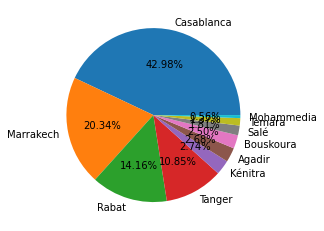

In [19]:
import matplotlib.pyplot as plt

###
city_name=all_data['City'].value_counts().index
city_val=all_data['City'].value_counts().values
#top 10 citys
plt.pie(city_val[:10],labels=city_name[:10],autopct='%1.2f%%')
#
plt.bar(keys,city_val.count()['Prix'])
plt.rcParams['figure.figsize'] = (10,6)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

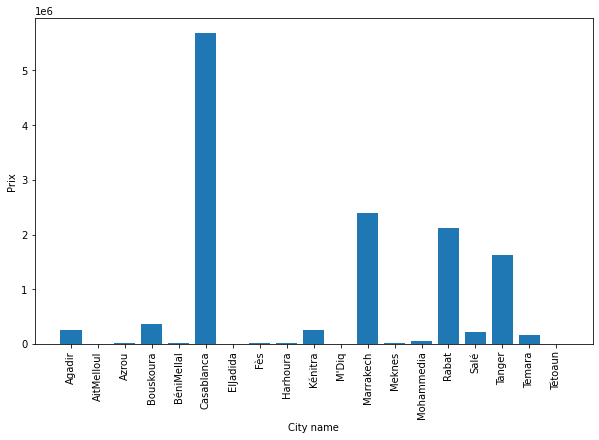

In [21]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Prix'])
plt.ylabel('Prix')
plt.xlabel('City name')
plt.rcParams['figure.figsize'] = (20,6)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()


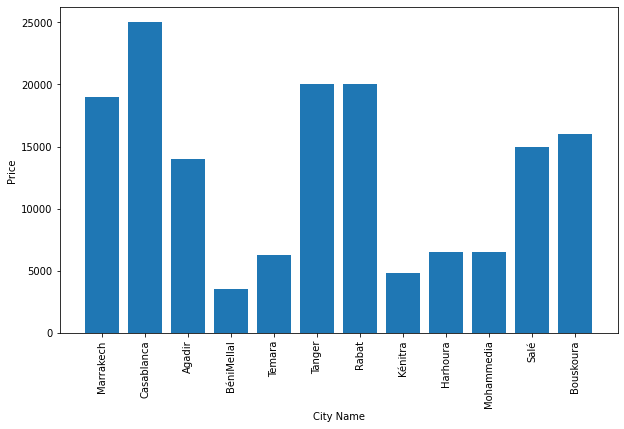

In [116]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt


#Add custom entries here
custom_df = all_data.loc[all_data['City'].isin([' '])]

# Create new df
new_df = pd.concat([all_data[:100], all_data[-100:], custom_df])
new_df.sort_values(by=['Prix'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

# Creating the bar plot
plt.bar(new_df['City'], new_df['Prix'])
plt.xticks(rotation=90) 
plt.xlabel("City Name")
plt.ylabel("Price") 
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

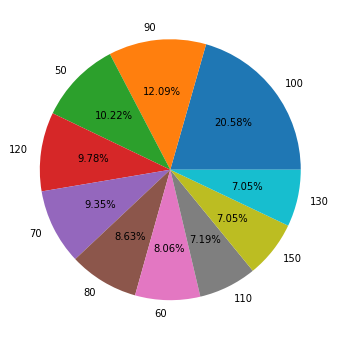

In [117]:
import matplotlib.pyplot as plt

###
city_name=all_data['outside'].value_counts().index
city_val=all_data['outside'].value_counts().values
#top 6 citys
plt.pie(city_val[:10],labels=city_name[:10],autopct='%1.2f%%')
#
plt.bar(keys,city_val.count()['Prix'])
plt.rcParams['figure.figsize'] = (10,6)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

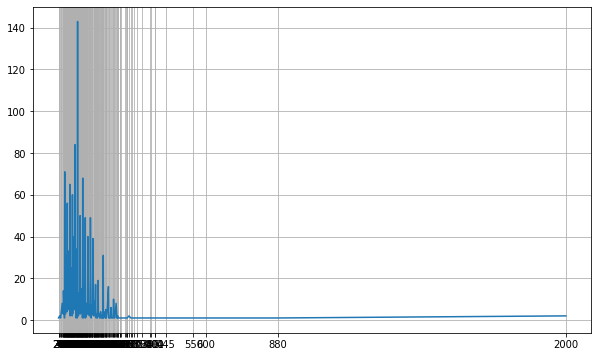

<Figure size 7200x7200 with 0 Axes>

In [118]:
keys = [pair for pair, df in all_data.groupby(['outside'])]

plt.plot(keys, all_data.groupby(['outside']).count()['Prix'])
plt.xticks(keys)
plt.grid()
plt.rcParams['figure.figsize'] = (20,6)
plt.figure(figsize=(100,100))
plt.show()




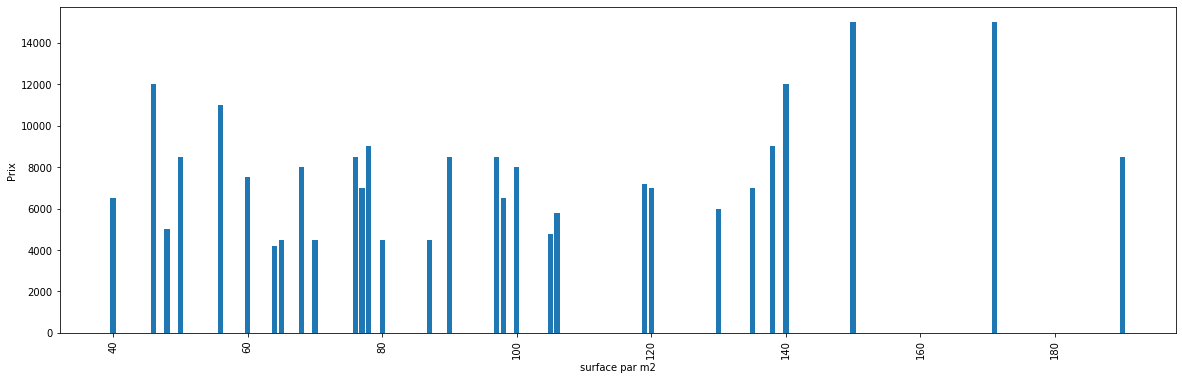

In [119]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt


#Add custom entries here
custom_df = all_data.loc[all_data['outside'].isin([' '])]

# Create new df
new_df = pd.concat([all_data[:20], all_data[-20:], custom_df])
new_df.sort_values(by=['Prix'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

# Creating the bar plot
plt.bar(new_df['outside'], new_df['Prix'])
plt.xticks(rotation=90) 
plt.xlabel("surface par m2")
plt.ylabel("Prix") 
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

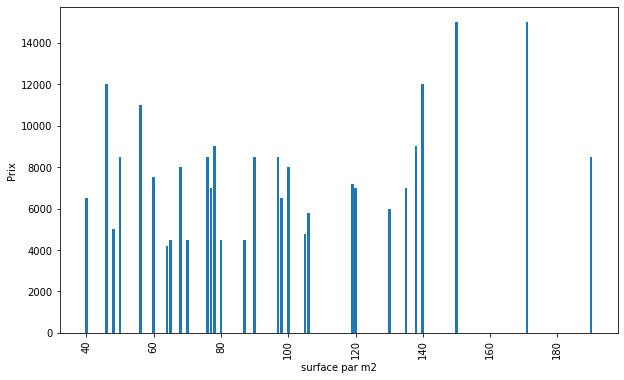

In [120]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt


#Add custom entries here
custom_df = all_data.loc[all_data['outside'].isin([' '])]

# Create new df
new_df = pd.concat([all_data[:20], all_data[-20:], custom_df])
new_df.sort_values(by=['Prix'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

# Creating the bar plot
plt.bar(new_df['outside'], new_df['Prix'])
plt.xticks(rotation=90) 
plt.xlabel("surface par m2")
plt.ylabel("Prix") 
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

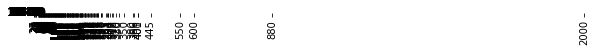

In [121]:
# Price / Surface  #xhal % dtaman dl m2 fl maghreb#
import matplotlib.pyplot as plt

###
city_name=all_data['Price/Surface'].value_counts().index
city_val=all_data['Price/Surface'].value_counts().values
#top 6 citys
plt.pie(city_val[:100],labels=city_name[:100],autopct='%1.2f%%')
#
# plt.bar(keys,city_val.count()['Price/Surface'])
plt.rcParams['figure.figsize'] = (10,10)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

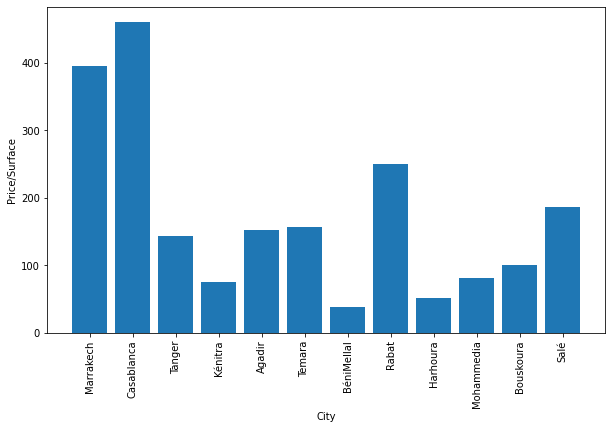

In [126]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt


#Add custom entries here
custom_df = all_data.loc[all_data['City'].isin([''])]

# Create new df
new_df = pd.concat([all_data[:100], all_data[-100:], custom_df])
new_df.sort_values(by=['Price/Surface'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

# Creating the bar plot
plt.bar(new_df['City'], new_df['Price/Surface'])
plt.xticks(rotation=90) 
plt.xlabel("City")
plt.ylabel("Price/Surface") 
plt.rcParams['figure.figsize'] = (10,6)
plt.show()